In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Inspiration

![ad](fakejobs.png)

Scams involving employment are getting more common. Numerous people have experienced much more job loss and economic stress as a result of the coronavirus. Even tech giants like Google and Facebook have put their recruiting on hold and are on a hiring freeze. Scammers are preying on those who lost their employment as a result of the Covid 19 outbreak. More than 20,700 business and employment opportunity scams were reported in the first quarter of 2022, with roughly a third of them causing financial losses for the victims.

The fraudulent promises of a job are used by fraudsters to entice job seekers with extremely lucrative career opportunities, which occasionally demand investment on their part. Even if no investment is necessary, fraudulent job postings allow con artists to get personal information such addresses, bank account numbers, social security numbers etc. They may later use this information for identity theft or financial fraud.

Our focus is on predicting, with adequate precision, if job posting is real or fake based on the job description.


# Goals

Based on the Exploratory Data Analysis (EDA) below, we shortlist the following two research questions for our project:

RQ1: What are some markers that job seekers can use to spot phony job offers?

RQ2: Can we train a classifier model that can adequately identify if a job posting is real or fake?

# Dataset

In [2]:
df = pd.read_csv("fake_job_postings.csv")
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


We have selected this dataset available on kaggle since it has a rich set of features including both textual job descriptions and meta-information about the jobs.

This dataset contains 18K job descriptions out of which about 800 are fake. It is a combination of integer, binary and textual data types.

There are 17 columns in the data - 16 feature columns and 1 output column. Here is a snippet of the columns in the data that we added from our jupyter notebook. 

The features include, but are not limited to, location, salary range, educational requirements, experience requirements, company profile and benefits provided.

We believe that the dataset is very valuable as it contains all the key features that could enable us to create a classification model which can identify fake job descriptions.


In [3]:
col_desc = pd.DataFrame()
col_desc["column"] = df.columns
col_desc["description"] = [
    "A unique ID assigned to each job",
    "The title of the advertised position or job",
    "Information about where is the job",
    "The department offering the job",
    "The amount that the job pays",
    "Information about the company advertising the job",
    "Job description",
    "Requirements enlisted",
    "Benefits offered by the company with the job",
    "1 if work from home allowed, 0 otherwise",
    "1 if the company has a logo, 0 otherwise",
    "1 if the job has any questions, 0 otherwise",
    "full-time, part-time, or contract etc.",
    "the experience required for the job",
    "educational requirements for the job",
    "The industry the job is in e.g engineering",
    "what work is required from the applicant",
    "1 if fake job, 0 if real job"
]
col_desc

,column,description
0,job_id,A unique ID assigned to each job
1,title,The title of the advertised position or job
2,location,Information about where is the job
3,department,The department offering the job
4,salary_range,The amount that the job pays
5,company_profile,Information about the company advertising the job
6,description,Job description
7,requirements,Requirements enlisted
8,benefits,Benefits offered by the company with the job
9,telecommuting,"1 if work from home allowed, 0 otherwise"


# Exploratory Data Analysis

Visualizing number of Nan values in each column

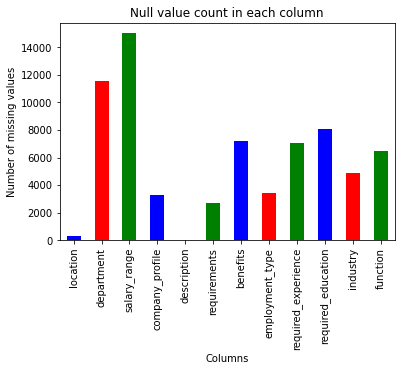

In [4]:
missing = df.isna().sum()
missing = missing[missing!=0]

ax = missing.plot(kind='bar', color=["b", "r", "g"])
ax.set_ylabel("Number of missing values")
ax.set_xlabel("Columns")
_ = plt.title("Null value count in each column")

Removing deparment and salary_range due to very high number of Nan values

In [5]:
df = df.drop(['department', 'salary_range'], axis=1)
df.head(3)

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


Correlation heatmap

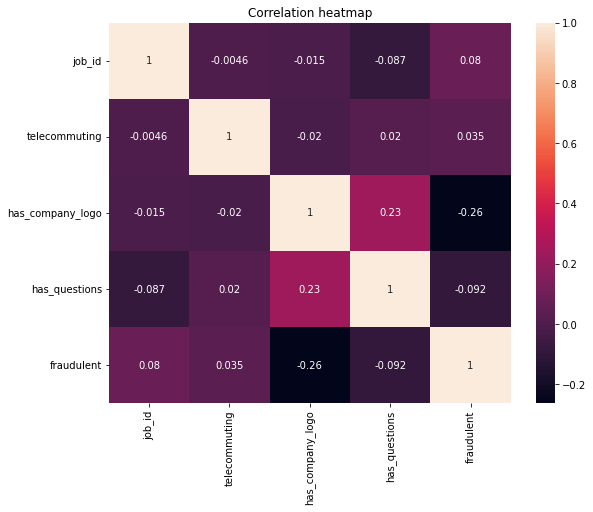

In [6]:
fig = plt.figure(figsize=(9,7))
correlation_matrix = df._get_numeric_data().corr()
sns.heatmap(correlation_matrix, annot=True)
ax = plt.title("Correlation heatmap")

Showing data imbalance.

Approximately 93% of jobs are real.

95.1565995525727% of samples are real


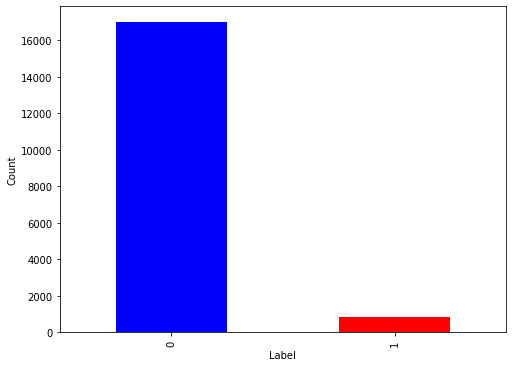

In [7]:
plt.figure()
vc = df["fraudulent"].value_counts()
vc.plot.bar(color=['b', 'r'], figsize=(8, 6))
plt.xlabel("Label")
plt.ylabel("Count")
percentage = (vc[0]/(vc[1]+vc[0]))*100
print(f'{percentage}% of samples are real')

Number of samples per country

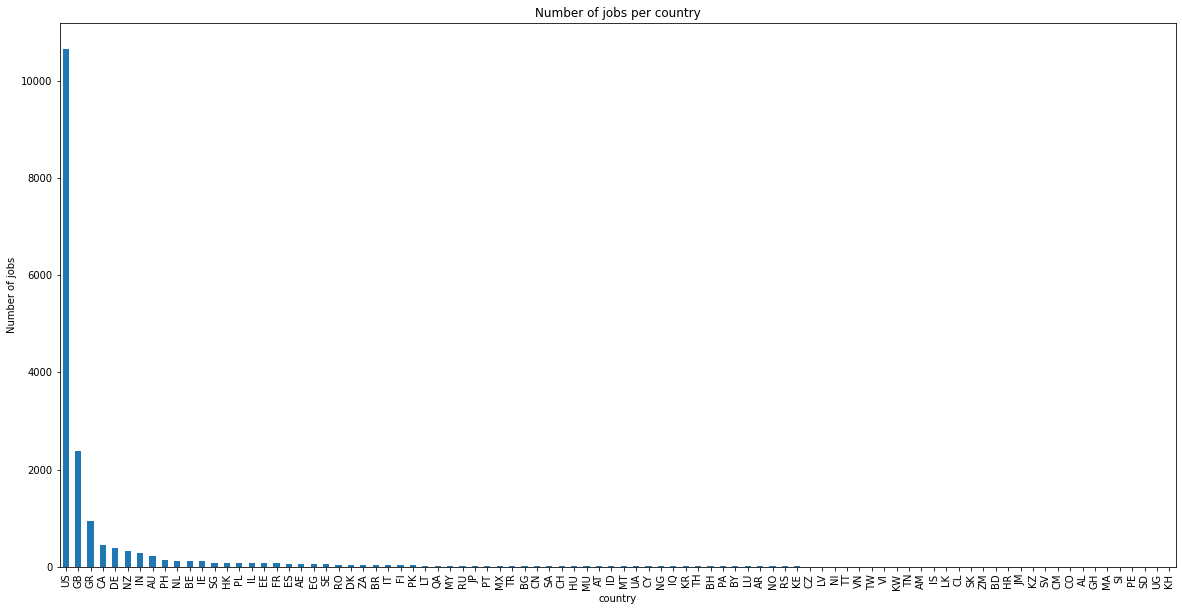

In [8]:
plt.figure(figsize=(20, 10))
df['location'].str.split(pat=', ', n=1, expand=True)[0].value_counts().plot.bar()
plt.xlabel("country")
plt.ylabel("Number of jobs")
ax = plt.title("Number of jobs per country")

High number of samples are from United States and are in English Language.

We filter job postings from US only to avoid language issues. We plan to use word embeddings and other NLP techniques to train a contextual model on job descriptions for fake job prediction.

In [9]:
df = df[df['location'].str.split(pat=', ', n=1, expand=True)[0] == "US"]
df.head(3)

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


For ease of processing, we split the location into country, state, and city.

The original column is dropped.

In [10]:
loc = df['location'].str.split(pat=', ', n=2, expand=True)

df.insert(2, "country", loc[0])
df.insert(3, "state", loc[1])
df.insert(4, "city", loc[2])

df = df.drop(['location'], axis=1)
df.head(3)

,job_id,title,country,state,city,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,US,NY,New York,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,3,Commissioning Machinery Assistant (CMA),US,IA,Wever,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,US,DC,Washington,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


To avoid issues in processing, we removed the rows where state and city is empty or Nan.

In [11]:
df = df[df["state"] != ""]
df = df[df['state'].notna()]
df = df[df["city"] != ""]
df = df[df['city'].notna()]

Number of samples per state

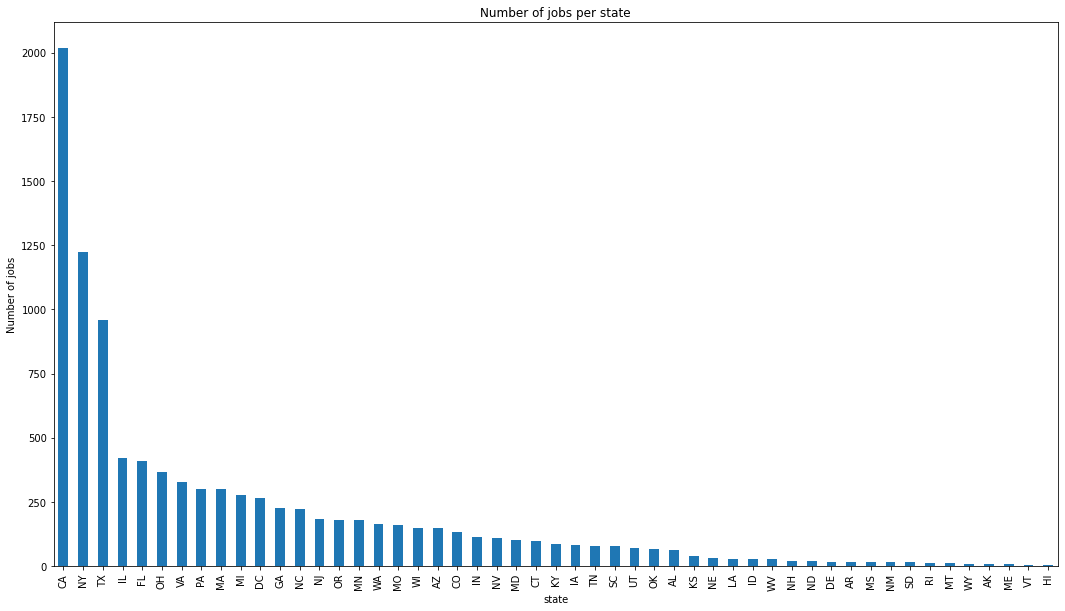

In [12]:
plt.figure(figsize=(18, 10))
df['state'].str.split(pat=', ', n=1, expand=True)[0].value_counts().plot.bar()
plt.xlabel("state")
plt.ylabel("Number of jobs")
ax = plt.title("Number of jobs per state")

A comparison of the number of fraudulent vs real jobs in each state

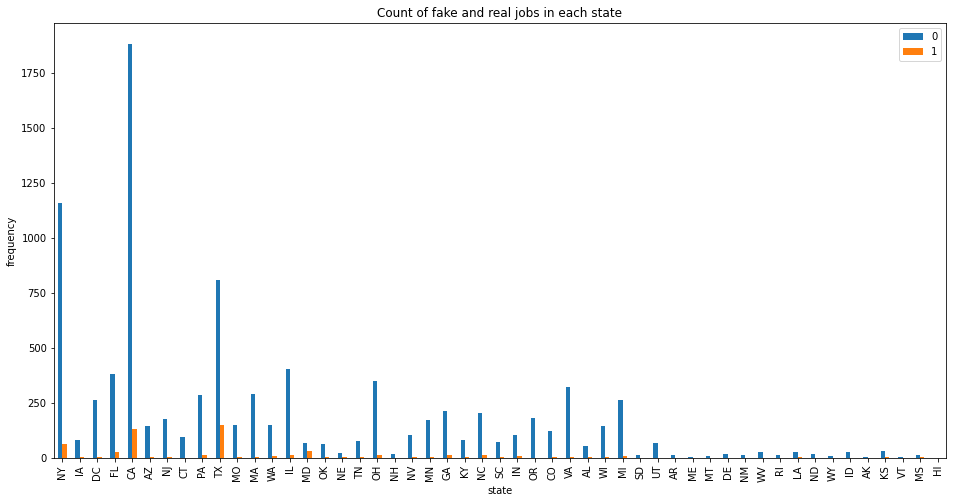

In [13]:
data_freq = []
for state in df["state"].unique():
    filter_state = df[df["state"] == state]
    data_freq.append([len(filter_state[filter_state["fraudulent"] == 0]), len(filter_state[filter_state["fraudulent"] == 1])])

df_grouped = pd.DataFrame(data_freq, index=df["state"].unique())
df_grouped.plot.bar(figsize=(16, 8))
plt.xlabel("state")
plt.ylabel("frequency")
ax = plt.title("Count of fake and real jobs in each state")

Ratio of fake to real jobs based for each state, city.

Example: ratio for NY, Manhattan = fake jobs in NY, Manhattan / real jobs in NY, Manhattan

Only cities with ratio > 1 are displayed on the bar chart to avoid clutter.

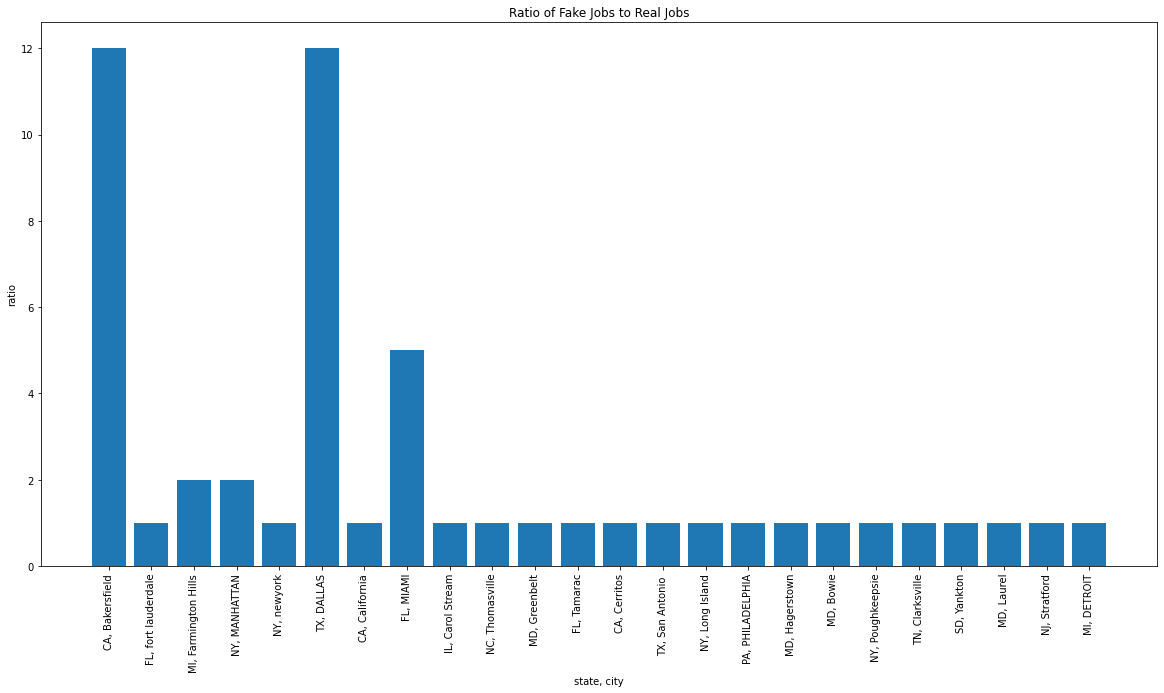

In [14]:
labels = df["state"] + ", " + df["city"]
labels = labels.unique()
final_labels = []
ratio_data = []
for label in labels:
    state = label.split(", ")[0]
    city = label.split(", ")[1]
    if state + ", " + city not in final_labels:
        filter_state = df[df["state"] == state]
        filter_both = filter_state[filter_state["city"] == city]
        ratio = len(filter_both[filter_both["fraudulent"] == 1])
        if len(filter_both[filter_both["fraudulent"] == 0]) != 0:
            ratio /= len(filter_both[filter_both["fraudulent"] == 0])
            if ratio >= 1:
                ratio_data.append(ratio)
                final_labels.append(state + ", " + city)

plt.figure(figsize=(20, 10))
plt.bar(final_labels, ratio_data)
plt.ylabel("ratio")
plt.xlabel("state, city")
plt.title("Ratio of Fake Jobs to Real Jobs")
ax = plt.xticks(rotation=90)

Investigating the counts of real and fake jobs for different categories in each column

Fake jobs are typically full time, entry level, engineering and administrative positions requiring high school level of education. Fake job postings are more commonly made by companies without a logo.

In [15]:
def func(df, col):
    data_freq = []
    label = []
    for u in df[col].unique():
        if u is not np.nan:
            filter_ = df[df[col] == u]
            data_freq.append([len(filter_[filter_["fraudulent"] == 0]), len(filter_[filter_["fraudulent"] == 1])])
            label.append(u)

    df_grouped = pd.DataFrame(data_freq, index=label)
    df_grouped.plot.bar(figsize=(12, 6))
    plt.title(f"Number fake and real jobs by {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

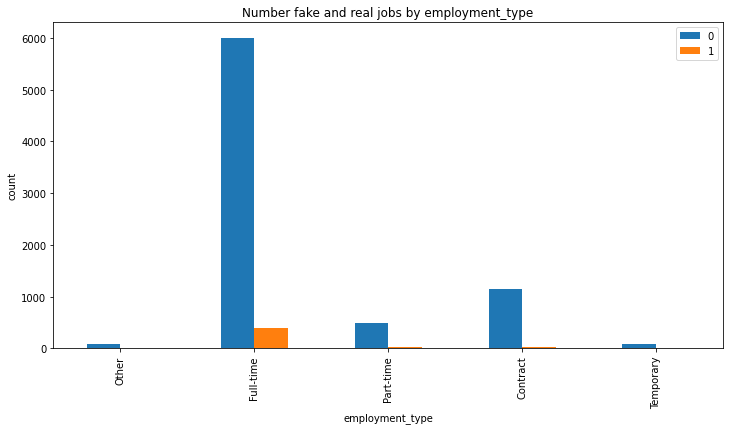

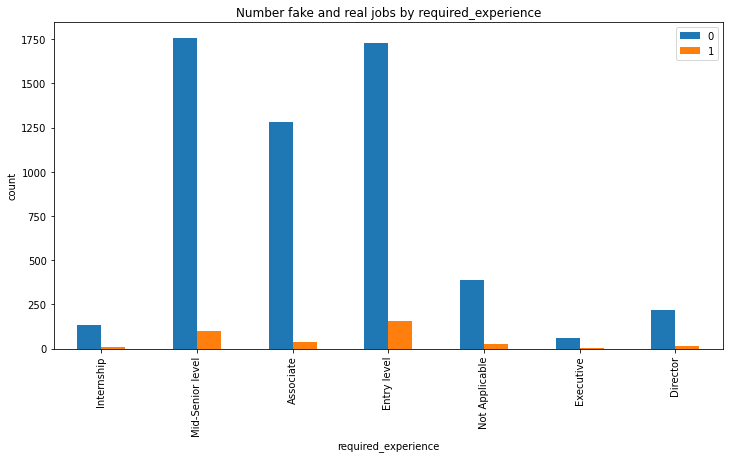

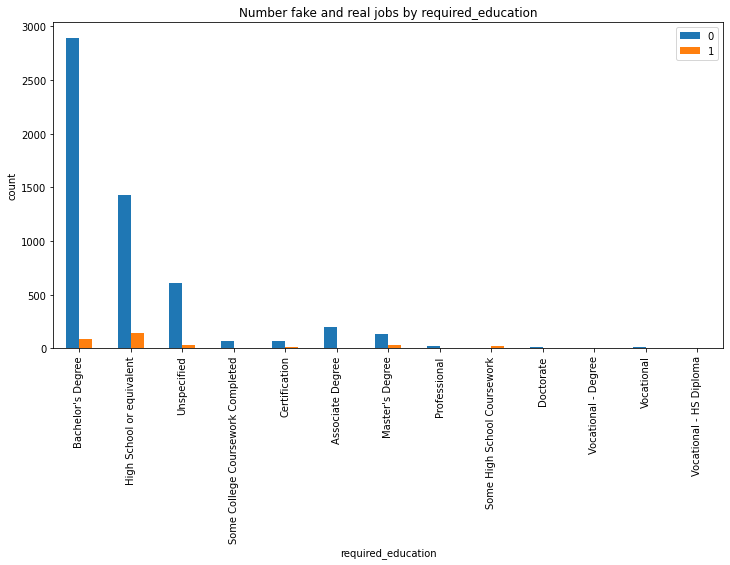

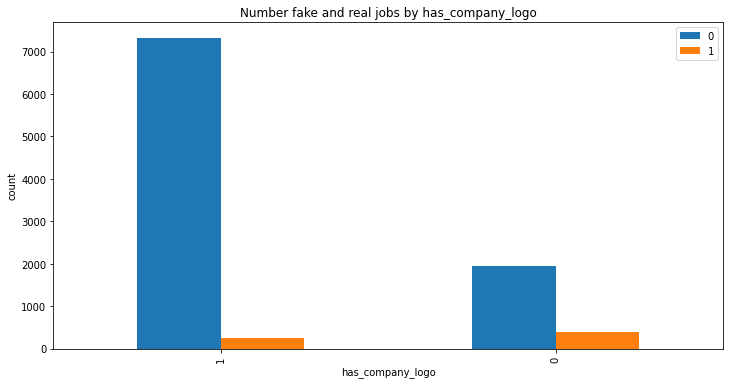

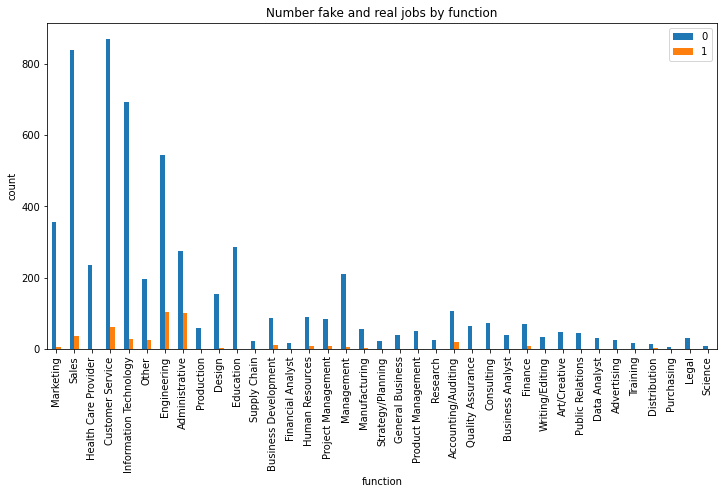

In [16]:
func(df, "employment_type")
func(df, "required_experience")
func(df, "required_education")
func(df, "has_company_logo")
func(df, "function")

Comparing the character count of real and fake jobs by plotting a histogram

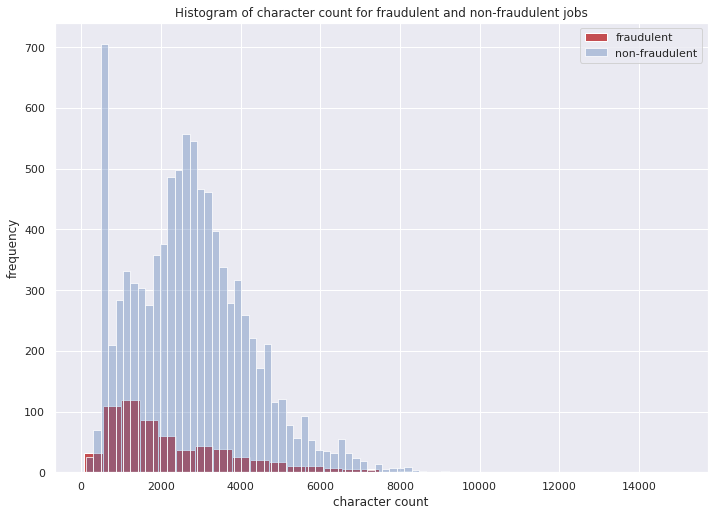

In [17]:
copy_df = df.copy()
textual_columns = ["title", "company_profile", "description", "requirements", "benefits", "required_experience", 
                  "required_education", "industry", "function"]
copy_df["text"] = ""
for col in textual_columns:
    copy_df[col] = copy_df[col].fillna('')
    copy_df["text"] =  copy_df["text"] + " " + copy_df[col]
        
sns.set(rc={'figure.figsize':(11.7,8.27)})

fraud = copy_df[copy_df["fraudulent"] == 1]["text"].str.len()
non_fraud = copy_df[copy_df["fraudulent"] == 0]["text"].str.len()
sns.histplot(fraud, alpha=1, label="fraudulent", color='r')
sns.histplot(non_fraud, alpha=0.35, label="non-fraudulent", color='b')
plt.legend(["fraudulent", "non-fraudulent"])
plt.xlabel("character count")
plt.ylabel("frequency")
plt.title("Histogram of character count for fraudulent and non-fraudulent jobs")
plt.show()

The histogram shows that real jobs generally have a much larger word count than fake jobs.